# Car Brand Prediction using CNN's

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Dense , Flatten , Input 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [ ]:
# resizing the image (224,224)

image_size = [224,224]
train_path = '/content/drive/MyDrive/Deep Learning/car brand/Datasets/Train'
test_path = '/content/drive/MyDrive/Deep Learning/car brand/Datasets/Test'

In [ ]:
# create resnet50 object as shown below and add preprocessing layer to the front of resnet50
# here we will be using imagenet weights

resnet = ResNet50(input_shape=image_size+[3] , weights='imagenet' , include_top=False)


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# dont train existing layers of resnet50

for layer in resnet.layers:

  layer.trainable = False

In [ ]:
# useful for getting number of output classes

folders = glob(train_path+'/*')
folders

['/content/drive/MyDrive/Deep Learning/car brand/Datasets/Train/mercedes',
 '/content/drive/MyDrive/Deep Learning/car brand/Datasets/Train/audi',
 '/content/drive/MyDrive/Deep Learning/car brand/Datasets/Train/lamborghini']

In [ ]:
output_dim = len(folders)

In [ ]:
# flattening the output from the last layer of resnet50

x = Flatten()(resnet.output)

In [ ]:
# feeding the output from flatten layer as input to softmax

prediction = Dense(units=output_dim , activation='softmax')(x)

model = Model(inputs=resnet.input , outputs = prediction)

In [ ]:
# view structure of the model

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# creating variation of images 

train_datagen = ImageDataGenerator(rescale=1./255 ,
                                   horizontal_flip = True,
                                   shear_range=0.2,
                                   zoom_range = 0.2)


test_datagen = ImageDataGenerator(rescale=1./255)   # never do data augmentation on test data

In [ ]:
train_dataset = train_datagen.flow_from_directory(train_path , target_size=(224,224) , batch_size=32 , class_mode='categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(test_path , target_size=(224,224) , batch_size=32 , class_mode='categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# number of batches of train data

print(len(train_dataset))

2


In [ ]:
# fit the model

r = model.fit_generator(train_dataset ,
          validation_data = test_dataset,
          epochs=50,
          steps_per_epoch = len(train_dataset),
          validation_steps = len(test_dataset)
          )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 1s 781ms/step - loss: 0.1760 - accuracy: 0.9844 - val_loss: 0.9338 - val_accuracy: 0.7069
Epoch 2/50
2/2 [==============================] - 1s 696ms/step - loss: 0.2405 - accuracy: 0.9531 - val_loss: 0.8600 - val_accuracy: 0.7069
Epoch 3/50
2/2 [==============================] - 1s 697ms/step - loss: 0.2460 - accuracy: 0.8750 - val_loss: 0.8464 - val_accuracy: 0.7414
Epoch 4/50
2/2 [==============================] - 1s 673ms/step - loss: 0.1708 - accuracy: 0.9688 - val_loss: 0.9233 - val_accuracy: 0.6897
Epoch 5/50
2/2 [==============================] - 1s 667ms/step - loss: 0.2412 - accuracy: 0.9219 - val_loss: 0.8761 - val_accuracy: 0.6897
Epoch 6/50
2/2 [==============================] - 1s 702ms/step - loss: 0.2120 - accuracy: 0.9375 - val_loss: 0.8321 - val_accuracy: 0.7931
Epoch 7/50
2/2 [==============================] - 1s 675ms/step - loss: 0.1781 - accuracy: 0.9844 - val_loss: 0.8394 - val_accuracy: 0.7586
Epoch 8/50
2/2 [====

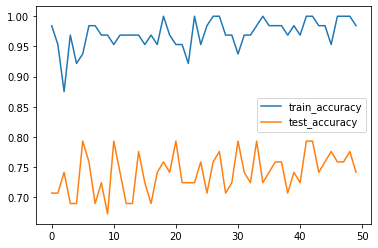

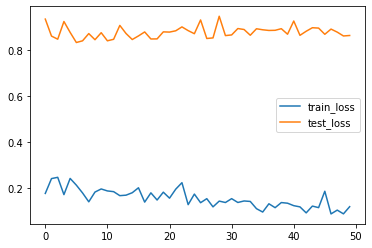

In [ ]:
# evaluating preformance of the model

plt.plot(r.history['accuracy'] , label='train_accuracy')
plt.plot(r.history['val_accuracy'] , label='test_accuracy')
plt.legend()
plt.show()


plt.plot(r.history['loss'] , label='train_loss')
plt.plot(r.history['val_loss'] , label='test_loss')
plt.legend()
plt.show()

In [ ]:
# saving the model

model.save('/content/drive/MyDrive/Deep Learning/car brand/model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
y_pred = model.predict(test_dataset)

y_pred

array([[6.07761592e-02, 5.38569450e-01, 4.00654376e-01],
       [2.93354094e-02, 3.04172277e-01, 6.66492283e-01],
       [2.31746975e-02, 2.27477312e-01, 7.49347985e-01],
       [6.61057560e-03, 4.89311188e-01, 5.04078209e-01],
       [6.82161748e-01, 1.43641695e-01, 1.74196526e-01],
       [2.03337334e-03, 1.27841085e-02, 9.85182464e-01],
       [7.77147040e-02, 1.57919142e-03, 9.20706153e-01],
       [2.11291939e-01, 6.96008146e-01, 9.26999226e-02],
       [1.07676452e-02, 8.35542043e-04, 9.88396823e-01],
       [4.82969135e-02, 4.92710248e-02, 9.02432084e-01],
       [1.25885289e-02, 3.51236807e-03, 9.83899117e-01],
       [1.09499469e-02, 9.39386964e-01, 4.96630520e-02],
       [8.95859241e-01, 1.02922603e-01, 1.21824630e-03],
       [3.12942290e-03, 9.92801070e-01, 4.06954810e-03],
       [2.80096829e-02, 9.65314925e-01, 6.67531695e-03],
       [4.05868031e-02, 8.48685298e-03, 9.50926304e-01],
       [5.65041834e-03, 5.52734613e-01, 4.41614985e-01],
       [6.57317817e-01, 1.67259

- Each row here gives the probalblity of occuerence of each brand of the car

In [ ]:
y_pred = np.argmax(y_pred  ,axis=1)


# 0=Audi  , 1=Lambo     , 2=Mercedes
print(y_pred)       

[1 2 2 2 0 2 2 1 2 2 2 1 0 1 1 2 1 0 1 1 1 2 1 0 0 1 1 1 2 1 2 1 1 2 1 1 1
 1 1 1 2 0 1 2 1 1 0 1 2 1 0 1 1 2 1 2 0 1]


In [ ]:
# checking ouptut on a particular image of test data

img = load_img(test_path + '/lamborghini/10.jpg' ,target_size=(224,224))

x = image.img_to_array(img)

print(x.shape)

(224, 224, 3)


In [ ]:
x = x/255

In [ ]:
x = np.expand_dims(x , axis=0)

In [ ]:
print(x)
print(x.shape)

[[[[0.06666667 0.02745098 0.        ]
   [0.06666667 0.02745098 0.        ]
   [0.06666667 0.02745098 0.        ]
   ...
   [0.05098039 0.00784314 0.        ]
   [0.05490196 0.01568628 0.01176471]
   [0.05490196 0.01568628 0.01176471]]

  [[0.06666667 0.02745098 0.        ]
   [0.06666667 0.02745098 0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.05490196 0.01176471 0.00392157]
   [0.05490196 0.01568628 0.01176471]
   [0.05490196 0.01568628 0.01176471]]

  [[0.07058824 0.03137255 0.        ]
   [0.07058824 0.03137255 0.        ]
   [0.07450981 0.03529412 0.        ]
   ...
   [0.05490196 0.01176471 0.00392157]
   [0.05490196 0.01568628 0.01176471]
   [0.05490196 0.01568628 0.01176471]]

  ...

  [[0.81960785 0.5058824  0.36078432]
   [0.8235294  0.50980395 0.3647059 ]
   [0.83137256 0.5176471  0.37254903]
   ...
   [0.84705883 0.5176471  0.3764706 ]
   [0.8392157  0.5058824  0.36078432]
   [0.8352941  0.5058824  0.36078432]]

  [[0.8156863  0.5019608  0.35686275]
   [0.8

In [ ]:
img_data = preprocess_input(x)
img_data

array([[[[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         ...,
         [-103.939   , -116.77116 , -123.62902 ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.74763 , -123.60941 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.743706, -123.60549 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        ...,

        [[-103.57822 , -116.27312 , -1

In [ ]:
model.predict(img_data)

array([[0.13139962, 0.14493316, 0.7236672 ]], dtype=float32)

In [ ]:
a = np.argmax(model.predict(img_data) , axis=1)

# it is predicting mercedes instead of lambo
print(a)

[2]
